In [56]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import datetime, os

In [57]:
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.applications import vgg16

In [58]:
vgg_conv = vgg16.VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

In [59]:
vgg_conv.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [5]:
print(tf.__version__)

2.0.0


In [6]:
from tensorflow.keras import utils
import os

_URL = 'http://download.tensorflow.org/example_images/flower_photos.tgz'

path_to_zip = utils.get_file('flowers.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'flower_photos')

In [60]:
# Создадим соответствующие переменные, которые будут содержать пути к этим директориям
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

train_daisy_dir = os.path.join(train_dir, 'daisy')
train_dandelion_dir = os.path.join(train_dir, 'dandelion')
train_roses_dir = os.path.join(train_dir, 'roses')
train_sunflowers_dir = os.path.join(train_dir, 'sunflowers')
train_tulips_dir = os.path.join(train_dir, 'tulips')
validation_daisy_dir = os.path.join(validation_dir, 'daisy')
validation_dandelion_dir = os.path.join(validation_dir, 'dandelion')
validation_roses_dir = os.path.join(validation_dir, 'roses')
validation_sunflowers_dir = os.path.join(validation_dir, 'sunflowers')
validation_tulips_dir = os.path.join(validation_dir, 'tulips')
test_daisy_dir = os.path.join(test_dir, 'daisy')
test_dandelion_dir = os.path.join(test_dir, 'dandelion')
test_roses_dir = os.path.join(test_dir, 'roses')
test_sunflowers_dir = os.path.join(test_dir, 'sunflowers')
test_tulips_dir = os.path.join(test_dir, 'tulips')

In [61]:
print('total training daisy images:', len(os.listdir(train_daisy_dir)))
print('total training dandelion images:', len(os.listdir(train_dandelion_dir)))
print('total training roses images:', len(os.listdir(train_roses_dir)))
print('total training sunflowers images:', len(os.listdir(train_sunflowers_dir)))
print('total training tulips images:', len(os.listdir(train_tulips_dir)))
print('total validation daisy images:', len(os.listdir(validation_daisy_dir)))
print('total validation dandelion images:', len(os.listdir(validation_dandelion_dir)))
print('total validation roses images:', len(os.listdir(validation_roses_dir)))
print('total validation sunflowers images:', len(os.listdir(validation_sunflowers_dir)))
print('total validation tulips images:', len(os.listdir(validation_tulips_dir)))
print('total test daisy images:', len(os.listdir(test_daisy_dir)))
print('total test dandelion images:', len(os.listdir(test_dandelion_dir)))
print('total test roses images:', len(os.listdir(test_roses_dir)))
print('total test sunflowers images:', len(os.listdir(test_sunflowers_dir)))
print('total test tulips images:', len(os.listdir(test_tulips_dir)))
number_of_train_images = len(os.listdir(train_daisy_dir)) + len(os.listdir(train_dandelion_dir)) + len(os.listdir(train_roses_dir)) + len(os.listdir(train_sunflowers_dir)) + len(os.listdir(train_tulips_dir))
number_of_validation_images = len(os.listdir(validation_daisy_dir)) + len(os.listdir(validation_dandelion_dir)) + len(os.listdir(validation_roses_dir)) + len(os.listdir(validation_sunflowers_dir)) + len(os.listdir(validation_tulips_dir))
number_of_test_images = len(os.listdir(test_daisy_dir)) + len(os.listdir(test_dandelion_dir)) + len(os.listdir(test_roses_dir)) + len(os.listdir(test_sunflowers_dir)) + len(os.listdir(test_tulips_dir))

print("------")
print("Total training images:",number_of_train_images )
print("Total validation images:", number_of_validation_images)
print("Total test images:", number_of_test_images)

total training daisy images: 500
total training dandelion images: 500
total training roses images: 500
total training sunflowers images: 500
total training tulips images: 500
total validation daisy images: 20
total validation dandelion images: 20
total validation roses images: 20
total validation sunflowers images: 20
total validation tulips images: 20
total test daisy images: 100
total test dandelion images: 100
total test roses images: 100
total test sunflowers images: 100
total test tulips images: 100
------
Total training images: 2500
Total validation images: 100
Total test images: 500


In [62]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

In [63]:
batch_size = 100
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [64]:
# Объект train_data_gen представляет собой DirectoryIterator.
# Изображения в папке train имеют разные размеры, при помещении в объект train_data_gen
# они будут перемешаны и к ним будет применён resize до размера, заданного аргументом
# target_size=(IMG_HEIGHT, IMG_WIDTH). Исходные изображения в папке не будут изменены.
# то при помещении в объект будет автоматически вычислена и добавлена
# колонка targets. Предполагается, что изображения разных классов должны
# быть в разных подпапках.
# Аргумент batch_size задаёт размер батчей, на которые будет разбит датасет.

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical')

Found 2500 images belonging to 5 classes.


In [65]:
train_data_gen.__len__()

25

In [66]:
# Валидационные данные на батчи делить нецелесообразно.
# Поэтому batch_size=number_of_validation_images
validation_data_gen = validation_image_generator.flow_from_directory(batch_size=number_of_validation_images,
                                                           directory=validation_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical')

Found 100 images belonging to 5 classes.


In [67]:
test_data_gen = test_image_generator.flow_from_directory(batch_size=number_of_test_images,
                                                           directory=test_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical')

Found 500 images belonging to 5 classes.


In [68]:
test_data_gen.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,

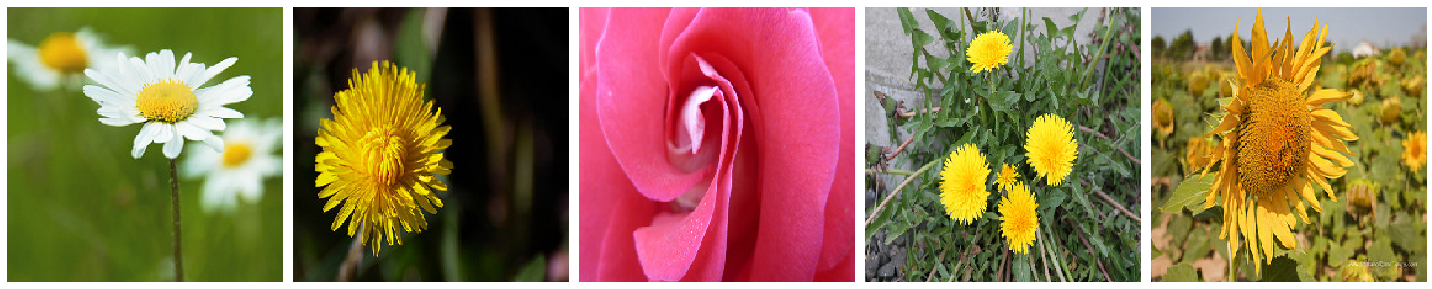

In [69]:
sample_training_images, _ = next(train_data_gen)

# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plotImages(sample_training_images[:5])

In [70]:
train_features = np.zeros(shape=(number_of_train_images, 7, 7, 512))
train_labels = np.zeros(shape=(number_of_train_images))

i = 0
for inputs_batch, labels_batch in train_data_gen:
    features_batch = vgg_conv.predict(inputs_batch)
    train_features[i * batch_size : (i + 1) * batch_size] = features_batch
    train_labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= number_of_train_images:
        break
train_features.shape

ValueError: could not broadcast input array from shape (100,5) into shape (100)

In [27]:
train_labels.shape

(2500, 5)

In [35]:
# Преобразуем полученный тензор в вектор, чтобы можно было подать его на полносвязный слой
# При этом колонка для батчей остаётся
train_features = np.reshape(train_features, (number_of_train_images, 7 * 7 * 512))
train_features.shape

(2500, 25088)

In [21]:
# Аналогично пропустим через Feature Extractor новые validation data.
# Отличие в том, что validation data представляют собой 1 батч. 
validation_features = np.zeros(shape=(number_of_validation_images, 7, 7, 512))
validation_labels = np.zeros(shape=(number_of_validation_images))

for inputs_batch, labels_batch in validation_data_gen:
    features_batch = vgg_conv.predict(inputs_batch)
    validation_features = features_batch
    validation_labels = labels_batch    
    break
    
validation_features.shape

(100, 7, 7, 512)

In [31]:
validation_labels.shape

(100, 5)

In [22]:
# Преобразуем полученный тензор в вектор, чтобы можно было подать его на полносвязный слой
# При этом колонка для батчей остаётся
validation_features = np.reshape(validation_features, (number_of_validation_images, 7 * 7 * 512))
validation_features.shape

(100, 25088)

In [23]:
# Аналогично пропустим через Feature Extractor новые test data.
# test data представляют собой 1 батч. 
test_features = np.zeros(shape=(number_of_test_images, 7, 7, 512))
test_labels = np.zeros(shape=(number_of_test_images))

for inputs_batch, labels_batch in test_data_gen:
    features_batch = vgg_conv.predict(inputs_batch)
    test_features = features_batch
    test_labels = labels_batch    
    break


In [24]:
test_features = np.reshape(test_features, (number_of_test_images, 7 * 7 * 512))
test_features.shape

(500, 25088)

In [33]:
test_labels.shape

(500, 5)

In [25]:
# Создадим собственный классификатор
 
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim= 7 * 7 * 512))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(5, activation='exponential'))
model.add(layers.Dense(5, activation='softmax'))

model.compile(optimizer= 'adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [36]:
# Обучим классификатор на данных, прошедших Feature Extractor

from tensorflow.keras import callbacks

max_epochs = 20
early_stopping = callbacks.EarlyStopping(patience=3)

history = model.fit(train_features,
                    train_labels,
                    batch_size=batch_size,
                    epochs=max_epochs,   
                    callbacks=[early_stopping],
                    validation_data=(validation_features,validation_labels),
                    verbose = 2)

Train on 2500 samples, validate on 100 samples
Epoch 1/20


ValueError: Creating variables on a non-first call to a function decorated with tf.function.

In [ ]:
test_loss, test_accuracy = model.evaluate(test_features, test_labels)
print('\nTest loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))

In [ ]:
model.save('Flowers_VGG16.h5')

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import datetime, os

model = tf.keras.models.load_model('Flowers_VGG16.h5')

In [ ]:
import imageio as imio
from skimage import color
from skimage.transform import resize

img = imio.imread('testimage.png')
img.shape

In [ ]:
filename1 = 'testimage.png''

# load images in PIL format
original1 = load_img(filename1, target_size=(224, 224))

 
# convert PIL images to a numpy array
numpy_image1 = img_to_array(original1)


# Convert images into batch format
image_batch1 = np.expand_dims(numpy_image1, axis=0)


plt.imshow(np.uint8(image_batch1[0]))
plt.show()


In [ ]:
features1 = vgg_conv.predict(image_batch1)
features1.shape

In [ ]:
features1 = np.reshape(features1, (1, 7 * 7 * 512))
features1.shape

In [ ]:
decision1 = load_model.predict(features1)

print(decision1)

In [ ]:
print('С вероятностью', np.max(predictions_single), 'это ', np.argmax(predictions_single))